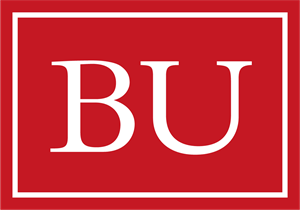

#**Assignment - 4: Association Rules**

---

<h2>AD699 A3 Data Mining (Spring 2024)</div>

<div style="text-align: center"> <h4>Submitted by: Aishwarya Malhotra (U17161095)</div>


# **TASK I: Association Rules**

In [ ]:
install.packages("arules")
library(arules)


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Loading required package: Matrix


Attaching package: ‘arules’


The following objects are masked from ‘package:base’:

    abbreviate, write




#### Solution - 1

In [ ]:
# Bring "Groceries" database into your enviornment
data("Groceries")
class(Groceries)
# The class of Groceries dataset is Transactions.

[1] "transactions"
attr(,"package")
[1] "arules"

In [ ]:
head(Groceries)
str(Groceries)
# The Groceries dataset contains 6 rows and 169 columns

transactions in sparse format with
 6 transactions (rows) and
 169 items (columns)

Formal class 'transactions' [package "arules"] with 3 slots
  ..@ data       :Formal class 'ngCMatrix' [package "Matrix"] with 5 slots
  .. .. ..@ i       : int [1:43367] 13 60 69 78 14 29 98 24 15 29 ...
  .. .. ..@ p       : int [1:9836] 0 4 7 8 12 16 21 22 27 28 ...
  .. .. ..@ Dim     : int [1:2] 169 9835
  .. .. ..@ Dimnames:List of 2
  .. .. .. ..$ : NULL
  .. .. .. ..$ : NULL
  .. .. ..@ factors : list()
  ..@ itemInfo   :'data.frame':	169 obs. of  3 variables:
  .. ..$ labels: chr [1:169] "frankfurter" "sausage" "liver loaf" "ham" ...
  .. ..$ level2: Factor w/ 55 levels "baby food","bags",..: 44 44 44 44 44 44 44 42 42 41 ...
  .. ..$ level1: Factor w/ 10 levels "canned food",..: 6 6 6 6 6 6 6 6 6 6 ...
  ..@ itemsetInfo:'data.frame':	0 obs. of  0 variables


#### Solution - 2

Eclat

parameter specification:
 tidLists support minlen maxlen            target  ext
    FALSE   0.085      1     15 frequent itemsets TRUE

algorithmic control:
 sparse sort verbose
      7   -2    TRUE

Absolute minimum support count: 835 

create itemset ... 
set transactions ...[169 item(s), 9835 transaction(s)] done [0.01s].
sorting and recoding items ... [11 item(s)] done [0.00s].
creating sparse bit matrix ... [11 row(s), 9835 column(s)] done [0.00s].
writing  ... [11 set(s)] done [0.00s].
Creating S4 object  ... done [0.00s].
     items              support    count
[1]  {whole milk}       0.25551601 2513 
[2]  {other vegetables} 0.19349263 1903 
[3]  {rolls/buns}       0.18393493 1809 
[4]  {yogurt}           0.13950178 1372 
[5]  {soda}             0.17437722 1715 
[6]  {root vegetables}  0.10899847 1072 
[7]  {tropical fruit}   0.10493137 1032 
[8]  {bottled water}    0.11052364 1087 
[9]  {sausage}          0.09395018  924 
[10] {shopping bags}    0.09852567  969 
[11] {p

Warning message in plot.window(xlim, ylim, log = log, ...):
“"horizontal" is not a graphical parameter”
Warning message in axis(if (horiz) 2 else 1, at = at.l, labels = names.arg, lty = axis.lty, :
“"horizontal" is not a graphical parameter”
Warning message in title(main = main, sub = sub, xlab = xlab, ylab = ylab, ...):
“"horizontal" is not a graphical parameter”
Warning message in axis(if (horiz) 1 else 2, cex.axis = cex.axis, ...):
“"horizontal" is not a graphical parameter”


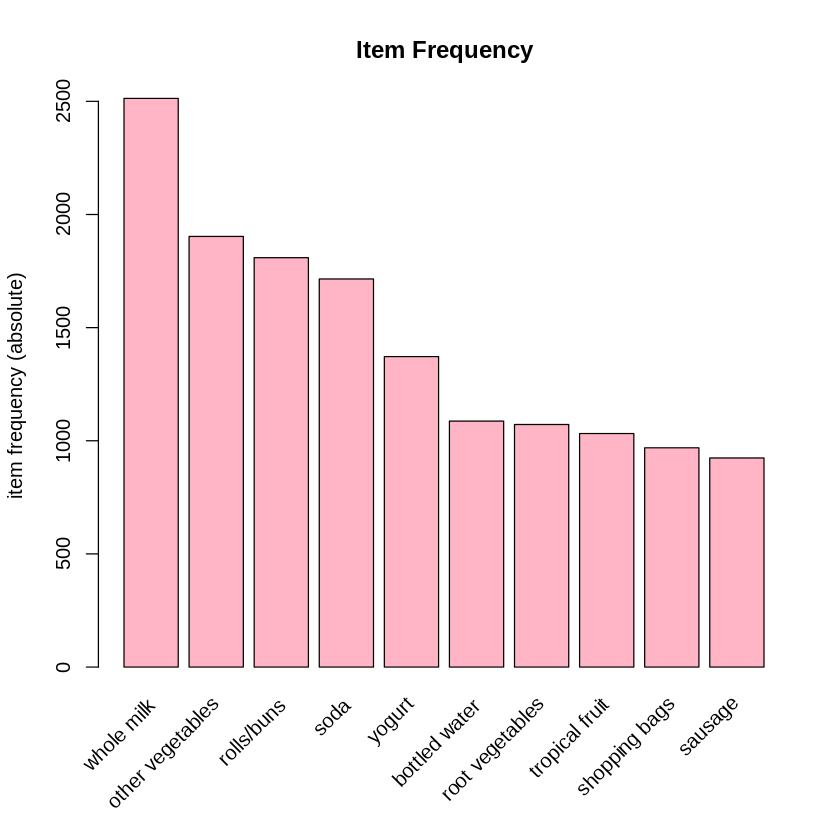

In [ ]:
frequent_items <- eclat(Groceries, parameter = list(supp = 0.085, maxlen =15))
inspect(frequent_items)
itemFrequencyPlot(Groceries, topN= 10, type="absolute", main = "Item Frequency", horizontal = TRUE, col = "pink1")


#### Solution - 3

In [ ]:
rules_1 <- apriori(data= Groceries, parameter = list (supp=0.001, conf = 0.1), appearance = list (default="rhs",lhs="newspapers"), control = list (verbose=FALSE))
rules_conf_1 <- sort (rules_1, by="confidence", decreasing=TRUE)
rules_lift_1 <- sort (rules_1, by="lift", decreasing=TRUE) # 'high-lift' rules.
inspect(head(rules_lift_1))

    lhs             rhs                     support     confidence coverage  
[1] {newspapers} => {fruit/vegetable juice} 0.008235892 0.1031847  0.07981698
[2] {newspapers} => {tropical fruit}        0.011794611 0.1477707  0.07981698
[3] {newspapers} => {yogurt}                0.015353330 0.1923567  0.07981698
[4] {newspapers} => {rolls/buns}            0.019725470 0.2471338  0.07981698
[5] {newspapers} => {whole milk}            0.027351296 0.3426752  0.07981698
[6] {newspapers} => {root vegetables}       0.011489578 0.1439490  0.07981698
    lift     count
[1] 1.427316  81  
[2] 1.408261 116  
[3] 1.378883 151  
[4] 1.343593 194  
[5] 1.341110 269  
[6] 1.320652 113  


**💡Interpretation of Results💡-**

I would select rule 5 {newspapers} => {whole milk} the rule is saying:-

LHS - If someone buys newspapers, RHS - they are 34.27% likely (confident) to also buy whole milk. Support - This happens in 2.74% of all transactions (meaning it's not super common, but it does happen). Lift - This purchase is 1.34 times more likely to happen together than by random chance (lift).

In [ ]:
rules_2 <- apriori(data= Groceries, parameter = list (supp=0.001, conf = 0.1), appearance = list (default="lhs",rhs="newspapers"), control = list (verbose=FALSE))
rules_conf_2 <- sort (rules_2, by="confidence", decreasing=TRUE)
rules_lift_2 <- sort (rules_2, by="lift", decreasing=TRUE)
inspect(head(rules_lift_2))


    lhs                           rhs              support confidence    coverage     lift count
[1] {tropical fruit,                                                                            
     other vegetables,                                                                          
     whole milk,                                                                                
     soda}                     => {newspapers} 0.001118454  0.3666667 0.003050330 4.593843    11
[2] {other vegetables,                                                                          
     ice cream}                => {newspapers} 0.001830198  0.3600000 0.005083884 4.510318    18
[3] {beef,                                                                                      
     chocolate}                => {newspapers} 0.001118454  0.3333333 0.003355363 4.176221    11
[4] {tropical fruit,                                                                            
     whole milk,              

 **💡Interpretation of Results💡-**

I would select rule 2 {other vegetables, ice cream} => {newspapers} the rule is saying:-

RHS - If someone buys whole milk, LHS - they are 36% likely (confident) to also buy newspapers along with it.

Support - This happens in 0.11% of all transactions (meaning it's fairly uncommon). Lift - This purchase is 4.59 times more likely to also
 buy newspaper than by random chance (lift).


#### Solution - 4

> **💡Interpretation💡-**
>
>Leveraging market basket analysis via these association rules, Star Market can optimize in-store conversion rates through strategic product placement at point-of-purchase. High-lift couplings like "newspapers => whole milk" can inform shelf schematics, while unexpected affinities like "whole milk => newspapers" can be exploited with targeted promotional campaigns at the shelf level.

#### Solution - 5

In [ ]:
install.packages("arulesViz")
library(arulesViz)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘RcppEigen’, ‘RcppArmadillo’, ‘ggforce’, ‘graphlayouts’, ‘ggraph’




In [50]:
rules <-  apriori(data= Groceries, parameter = list (supp=0.001, conf = 0.1), appearance = list (default="rhs",lhs="newspapers"), control = list (verbose=FALSE))

#Sort rules by confidence
rules_conf <- sort(rules, by = "confidence", decreasing = TRUE)

# Choosing the top three rules as the three to inspect
top_3_rules <- head(rules_conf, 3)
top_3_rules

set of 3 rules 

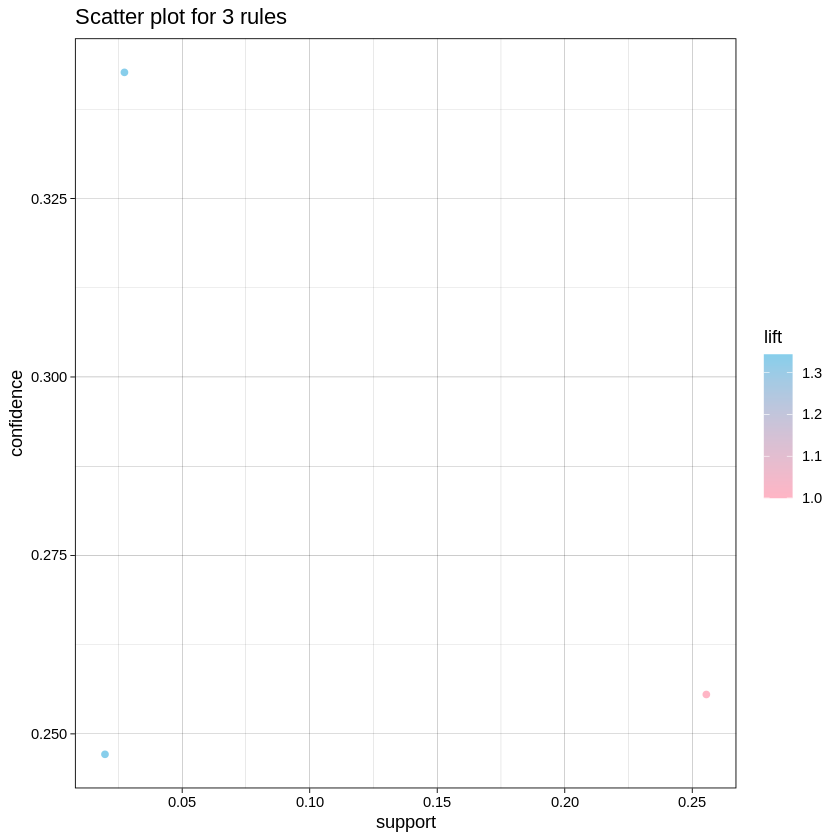

In [51]:
#Plot Scatter plot of the rules
plot(top_3_rules, col= c("skyblue", "pink1")) #gradient fill is not very visible

The above illustration represents a scatter plot with top 3 rules of the variable "newspapers". Its shows high confidence low support for 1 rule, low confidence and low support for 2nd rule and low confidence high support for the 3rd rule. So representing the newspaper is brought with other products very rarely. This could be because of the e-newspapers that are now available at a cheaper price.

#### Solution - 6

In [ ]:
# Plot rules with additional component
plot(top_3_rules, method = "graph", engine ="htmlwidget")
#The graph is not working in collab, so I have attached a picture from RStudio. I will also attach my Rstudio file.

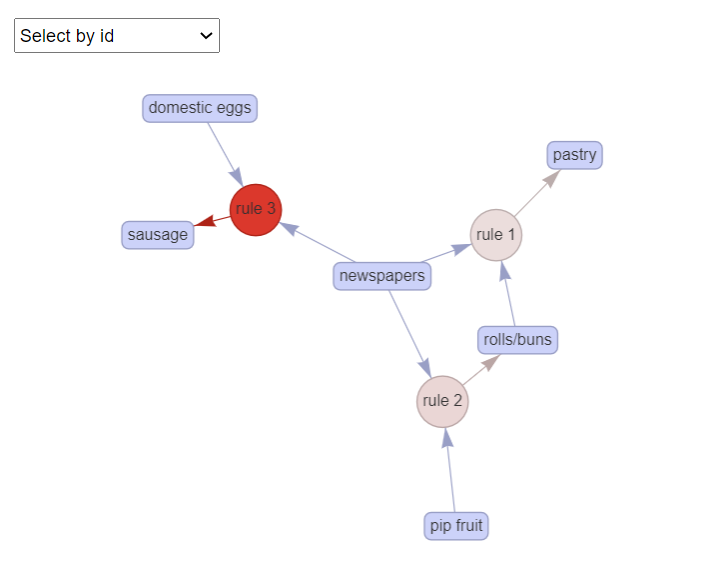

Rule - 1
Based on the support and confidence values, this rule suggests a weak but positive association between items. While not a very strong rule, it indicates a buying pattern where customers who purchase newspapers and rolls/buns are slightly more likely to also buy pastry during the same shopping trip.

Rule - 2
Based on the support and confidence values, this rule suggests a weak but positive association between these items. While not very strong rule, it indicates a buying pattern where customers who purchase newspapers and pip fruit are slightly more likely to also buy  rolls/ buns at the same shopping trip.

Rule - 3
This rule is interesting because it has the highest lift value (2.82) among the three examples. This suggests a stronger than expected association between domestic eggs, newspapers, and sausage purchases. Here are some possible interpretations:

Breakfast Meal Prep: Customers buying newspapers and domestic eggs on the same trip might be planning to make breakfast at home and might also purchase sausage as part of their breakfast ingredients.
Weekly Shopping List: This association could reflect a customer's typical shopping list where domestic eggs, newspapers, and sausage are all part of their regular purchases.

# **TASK II: Classification Tree**

In [41]:
install.packages("ISLR")
library(ISLR)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



#### Solution - 1

In [145]:
##Solution - 1
#Bring the College dataset into local environment.
data(College)

In [146]:
help(College)

Top25perc
Pct. new students from top 25% of H.S. class

#### Solution - 2

In [147]:
College$yield <- (College$Enroll / College$Accept) * 100

In [148]:
College <- subset(College, select = -c(Enroll, Accept))

In [149]:
str(College)

'data.frame':	777 obs. of  17 variables:
 $ Private    : Factor w/ 2 levels "No","Yes": 2 2 2 2 2 2 2 2 2 2 ...
 $ Apps       : num  1660 2186 1428 417 193 ...
 $ Top10perc  : num  23 16 22 60 16 38 17 37 30 21 ...
 $ Top25perc  : num  52 29 50 89 44 62 45 68 63 44 ...
 $ F.Undergrad: num  2885 2683 1036 510 249 ...
 $ P.Undergrad: num  537 1227 99 63 869 ...
 $ Outstate   : num  7440 12280 11250 12960 7560 ...
 $ Room.Board : num  3300 6450 3750 5450 4120 ...
 $ Books      : num  450 750 400 450 800 500 500 450 300 660 ...
 $ Personal   : num  2200 1500 1165 875 1500 ...
 $ PhD        : num  70 29 53 92 76 67 90 89 79 40 ...
 $ Terminal   : num  78 30 66 97 72 73 93 100 84 41 ...
 $ S.F.Ratio  : num  18.1 12.2 12.9 7.7 11.9 9.4 11.5 13.7 11.3 11.5 ...
 $ perc.alumni: num  12 16 30 37 2 11 26 37 23 15 ...
 $ Expend     : num  7041 10527 8735 19016 10922 ...
 $ Grad.Rate  : num  60 56 54 59 15 55 63 73 80 52 ...
 $ yield      : num  58.5 26.6 30.6 39.3 37.7 ...


#### Solution - 3 a]

In [150]:
# Calculate the median yield
median_yield <- median(College$yield)

# Convert yield into a factor based on the median
College$yield <- ifelse(College$yield >= median_yield, "high yield", "low yield")

# Convert yield to factor
College$yield <- factor(College$yield, levels = c("low yield", "high yield"))


In [151]:
str(College)

'data.frame':	777 obs. of  17 variables:
 $ Private    : Factor w/ 2 levels "No","Yes": 2 2 2 2 2 2 2 2 2 2 ...
 $ Apps       : num  1660 2186 1428 417 193 ...
 $ Top10perc  : num  23 16 22 60 16 38 17 37 30 21 ...
 $ Top25perc  : num  52 29 50 89 44 62 45 68 63 44 ...
 $ F.Undergrad: num  2885 2683 1036 510 249 ...
 $ P.Undergrad: num  537 1227 99 63 869 ...
 $ Outstate   : num  7440 12280 11250 12960 7560 ...
 $ Room.Board : num  3300 6450 3750 5450 4120 ...
 $ Books      : num  450 750 400 450 800 500 500 450 300 660 ...
 $ Personal   : num  2200 1500 1165 875 1500 ...
 $ PhD        : num  70 29 53 92 76 67 90 89 79 40 ...
 $ Terminal   : num  78 30 66 97 72 73 93 100 84 41 ...
 $ S.F.Ratio  : num  18.1 12.2 12.9 7.7 11.9 9.4 11.5 13.7 11.3 11.5 ...
 $ perc.alumni: num  12 16 30 37 2 11 26 37 23 15 ...
 $ Expend     : num  7041 10527 8735 19016 10922 ...
 $ Grad.Rate  : num  60 56 54 59 15 55 63 73 80 52 ...
 $ yield      : Factor w/ 2 levels "low yield","high yield": 2 1 1 2 1 1 1 

#### Solution - 4

In [152]:
#Data Partitioning
set.seed(1131)
n <- nrow(College)
train_size <- round(0.6 * n)
train_index <- sample(1:n, train_size)
train <- College[train_index, ]
valid <- College[-train_index, ]

> **💡Interpretation💡-**
>
> The data is partitioned into training & validation set this will help us train our model on one sebset (train) and evaluate its performance on another subset (valid).
>
> **STEPS:**
>
> - Set seed value
>
> - Determine the number of rows in the College dataset
>
> - Calculate the size of the training set (60% of the total number of rows)
>
> - Randomly sample now indices to create the training set.
>
> - Subset the Collehe dataset using the sampled riw indices to create the training set.
>
> - Create the validation set by excluding the row indices used for the training set.

#### Solution - 5

In [55]:
install.packages("rpart")
install.packages("rpart.plot")
library(rpart)
 library(rpart.plot)
 library(tidyverse)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.0     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ tidyr::expand() masks Matrix::expand()
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
✖ tidyr::pack()   masks Matrix::pack()
✖ dplyr::recode() masks arules::recode()
✖ tidyr::unpack() masks Matrix::unpack()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [153]:
#Build tree model
tree_model <- rpart(yield ~ ., data = train)
tree_model

n= 466 

node), split, n, loss, yval, (yprob)
      * denotes terminal node

  1) root 466 227 high yield (0.4871245 0.5128755)  
    2) Room.Board>=3606.5 343 140 low yield (0.5918367 0.4081633)  
      4) Apps>=825 255  80 low yield (0.6862745 0.3137255)  
        8) F.Undergrad< 5783.5 203  47 low yield (0.7684729 0.2315271)  
         16) Top10perc< 75.5 194  40 low yield (0.7938144 0.2061856)  
           32) Outstate>=13309 75   6 low yield (0.9200000 0.0800000) *
           33) Outstate< 13309 119  34 low yield (0.7142857 0.2857143)  
             66) F.Undergrad< 1359.5 37   4 low yield (0.8918919 0.1081081) *
             67) F.Undergrad>=1359.5 82  30 low yield (0.6341463 0.3658537)  
              134) Apps>=1422.5 63  15 low yield (0.7619048 0.2380952) *
              135) Apps< 1422.5 19   4 high yield (0.2105263 0.7894737) *
         17) Top10perc>=75.5 9   2 high yield (0.2222222 0.7777778) *
        9) F.Undergrad>=5783.5 52  19 high yield (0.3653846 0.6346154)  
      

#### Solution - 6]

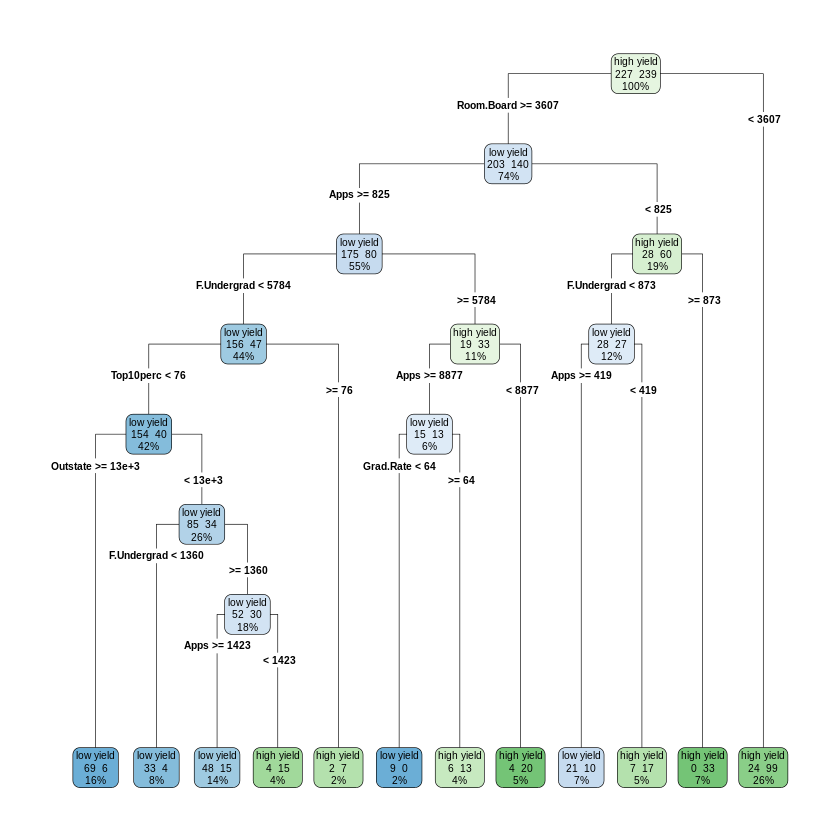

In [154]:
# Display a Classification Tree
rpart.plot(tree_model,type=4,extra=101)

#### Solution - 6 a]

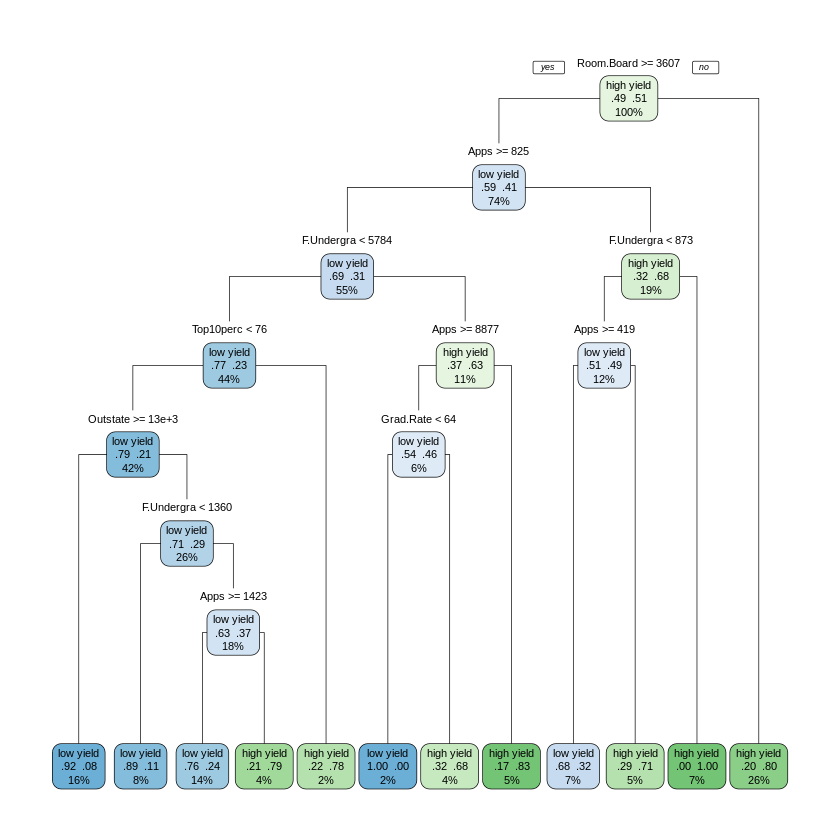

In [155]:
# Adjust the model
# Alternative 1
rpart.plot(tree_model, type = 1, extra = 104, fallen.leaves = TRUE, split.font = 1, varlen = -10)

#### Solution - 6 b]

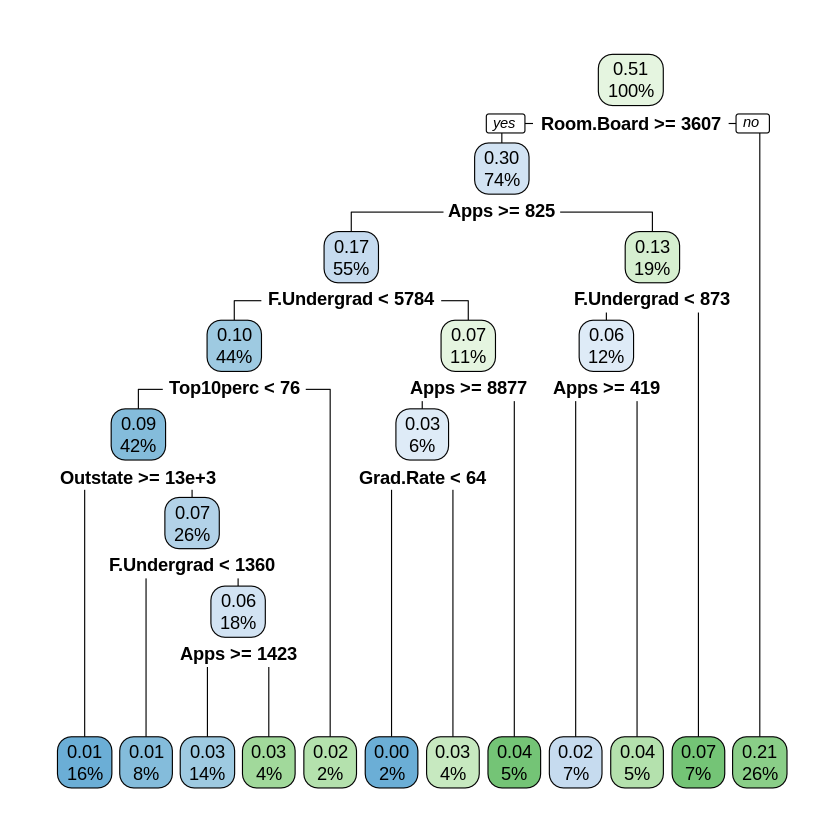

In [156]:
# Alternative way of viewing the plot
# Alternative 2
rpart.plot(tree_model, type = 2, extra =111,)

#### Solution - 6 c]

> **💡Interpretation of Graph💡-**
>
>For me I think the Alternative 1 is the best version with adjusted parameters as it strikes a good balance between readability and detail. The fallen leaves and adjusted font size enhances clarity without sacrificing important information about the tree.

#### Solution - 7

> **💡Interpretation💡-**
>
>For me Alternative 1: The decision tree  in the image splits the data at the root node based on the variable F.Undergra < 5784. This means that the data is divided into 2 branches: one for the applicants with financial undergraduate aid greater than or equal to $5784.
>
>The root node is significant because it is the first step in the decision process, it divides the entire dataset into 2 initial subgroups & it has a high predictive power. We have used Yield as a variable - high yield vs low yield.

#### Solution - 8

> **💡Interpretation💡-**
>
>Not all variable appear,only the important variable.

#### Solution - 9

> **💡Interpretation💡-**
> - Start: Applicant recieves financial undergraduate aid less than `$5784` (F.Undergrad < 5784) (from the root node).
>
> - Next: Allicant's ACT score is greater than or equal to 28 (ACT > =28).
>
> - Outcome: This path leads to a terminal node labeled High Yield Rate.
>
> This rule suggests that admitted students who recieve less than `$5784` in financial aid and have an ACT score of 28 or higher are more likely to enroll at the college, indicating a high yield rate for this specific group.




#### Solution - 10

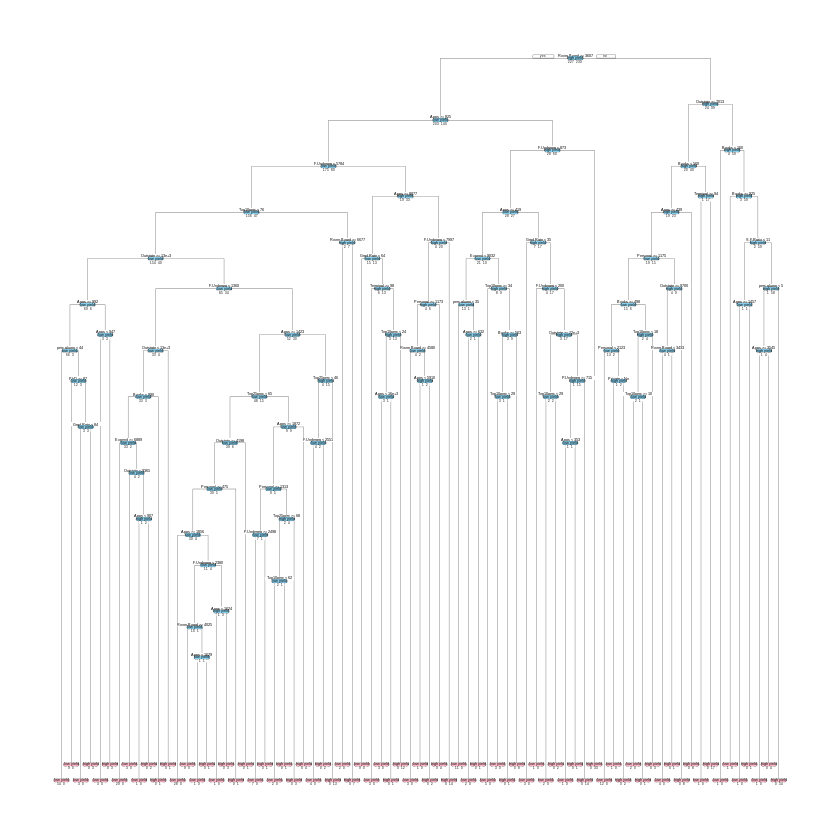

In [157]:
overfit_tree <- rpart(yield ~ ., data = train, method = "class", cp = 0, minsplit = 2)
rpart.plot(overfit_tree, type = 1, extra = 1, under = TRUE, split.font = 1, varlen = -10, box.col = ifelse(overfit_tree
$frame$var == "<leaf>", 'pink1', 'skyblue'))

#### Solution - 11


Classification tree:
rpart(formula = yield ~ ., data = train, method = "class", cp = 0, 
    minsplit = 2)

Variables actually used in tree construction:
 [1] Apps        Books       Expend      F.Undergrad Grad.Rate   Outstate   
 [7] P.Undergrad perc.alumni Personal    PhD         Private     Room.Board 
[13] S.F.Ratio   Terminal    Top10perc   Top25perc  

Root node error: 227/466 = 0.48712

n= 466 

          CP nsplit rel error  xerror     xstd
1  0.2775330      0  1.000000 1.05727 0.047527
2  0.1409692      1  0.722467 0.77974 0.046155
3  0.0616740      2  0.581498 0.67841 0.044732
4  0.0242291      3  0.519824 0.62555 0.043772
5  0.0220264      5  0.471366 0.59912 0.043232
6  0.0198238      6  0.449339 0.60352 0.043325
7  0.0161527      8  0.409692 0.60352 0.043325
8  0.0132159     11  0.361233 0.59471 0.043138
9  0.0099119     15  0.308370 0.62996 0.043858
10 0.0088106     20  0.255507 0.66960 0.044583
11 0.0066079     29  0.176211 0.66960 0.044583
12 0.0044053     31  0.16299

[1] 8

[1] 8

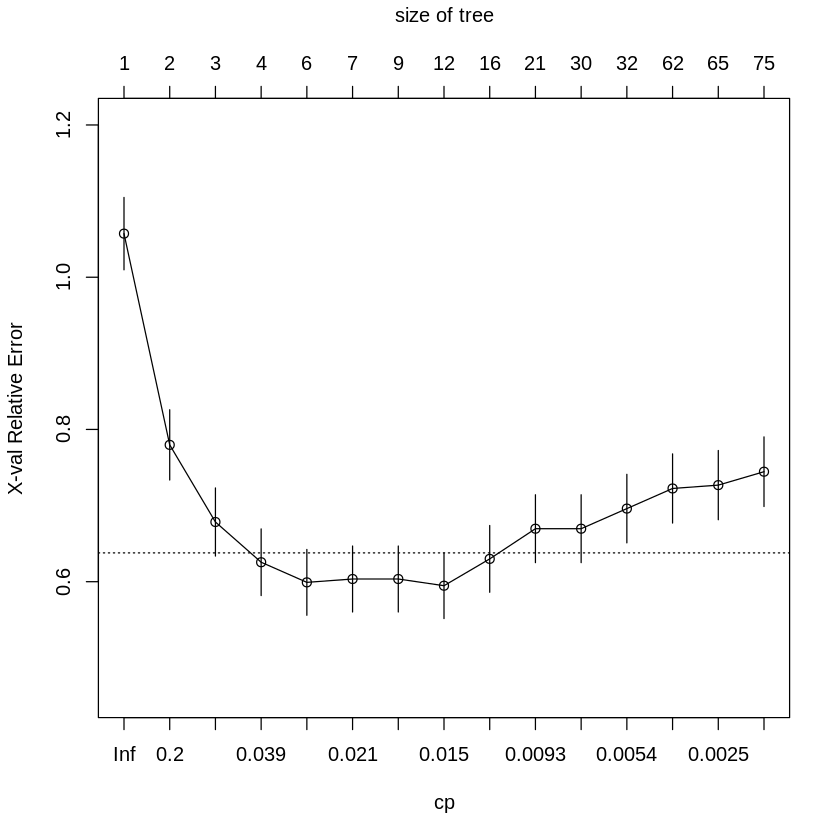

In [158]:
a <- printcp(overfit_tree)
a <- data.frame (a)
which.min(a$xerror)
which.min(a$xstd)
plotcp(overfit_tree)

> **💡Interpretation of results💡-**
>
>CP = 0.1403509: This step reduces the relative error (meaning the tree fits the data better) while keeoing the xerror (generalization error) relatively low. This is a good balance. As CP increases further, the xerror starts to climb more significantly, indicating the model might be losing its ability to generalize well.
>
> Therefore, choosing CP = 0.1403509 offeres a good compromize between fitting the data and avoiding overfitting.

#### Solution - 12

In [159]:
#Generate a new tree model with the cp = 0.1403509
optimal_tree <- rpart(yield ~ ., data = train, method = "class", cp = 0.1403509, minsplit = 2, maxdepth = 10)
optimal_tree

n= 466 

node), split, n, loss, yval, (yprob)
      * denotes terminal node

1) root 466 227 high yield (0.4871245 0.5128755)  
  2) Room.Board>=3606.5 343 140 low yield (0.5918367 0.4081633)  
    4) Apps>=825 255  80 low yield (0.6862745 0.3137255) *
    5) Apps< 825 88  28 high yield (0.3181818 0.6818182) *
  3) Room.Board< 3606.5 123  24 high yield (0.1951220 0.8048780) *

#### Solution - 13

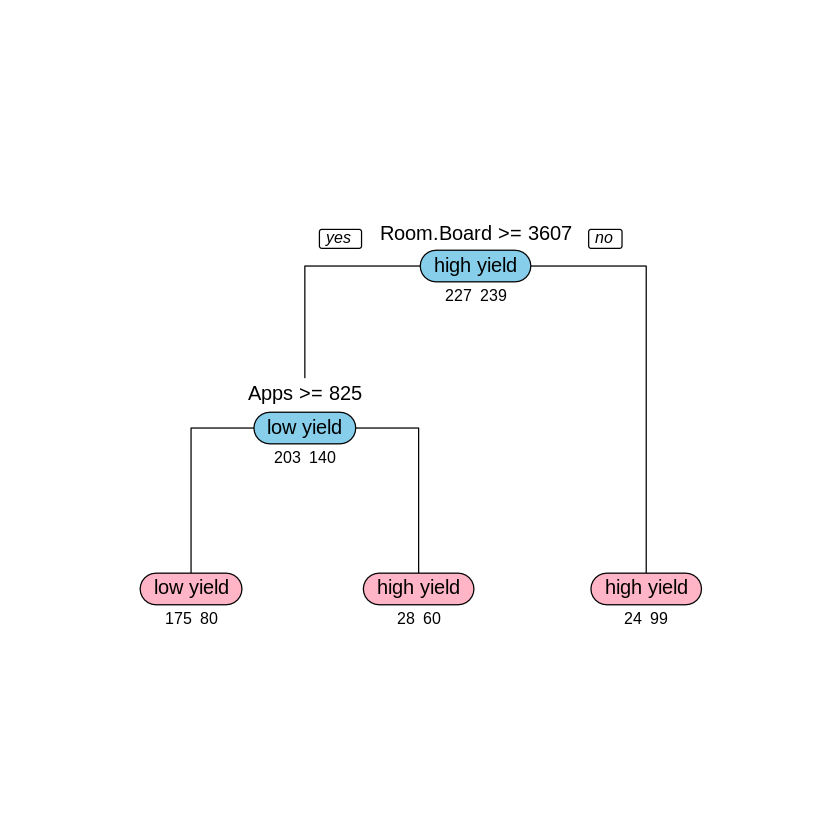

In [160]:
rpart.plot(optimal_tree, type = 1, extra = 1, under = TRUE, split.font = 1, varlen = -10, box.col = ifelse(optimal_tree
$frame$var == "<leaf>", 'pink1', 'skyblue'))

#### Solution - 14 a]

In [115]:
install.packages("caret")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘listenv’, ‘parallelly’, ‘future’, ‘globals’, ‘shape’, ‘future.apply’, ‘numDeriv’, ‘progressr’, ‘SQUAREM’, ‘diagram’, ‘lava’, ‘prodlim’, ‘proxy’, ‘clock’, ‘gower’, ‘hardhat’, ‘ipred’, ‘timeDate’, ‘e1071’, ‘ModelMetrics’, ‘plyr’, ‘pROC’, ‘recipes’, ‘reshape2’




In [117]:
library(caret)

Loading required package: lattice


Attaching package: ‘caret’


The following object is masked from ‘package:purrr’:

    lift




In [163]:
# Predictions on training set using overfit_tree
train_pred_overfit <- predict(overfit_tree, train, type = "class")

# Confusion matrix for overfit_tree on training set
confusionMatrix(train_pred_overfit, train$yield)

Confusion Matrix and Statistics

            Reference
Prediction   low yield high yield
  low yield        227          0
  high yield         0        239
                                     
               Accuracy : 1          
                 95% CI : (0.9921, 1)
    No Information Rate : 0.5129     
    P-Value [Acc > NIR] : < 2.2e-16  
                                     
                  Kappa : 1          
                                     
 Mcnemar's Test P-Value : NA         
                                     
            Sensitivity : 1.0000     
            Specificity : 1.0000     
         Pos Pred Value : 1.0000     
         Neg Pred Value : 1.0000     
             Prevalence : 0.4871     
         Detection Rate : 0.4871     
   Detection Prevalence : 0.4871     
      Balanced Accuracy : 1.0000     
                                     
       'Positive' Class : low yield  
                                     

The overfit tree achieved a perfect accuracy of 1.00, which means it classified all observations correctly. However, this indicates potential overfitting to the training data.

In [164]:
# Predictions on validation set using overfit_tree
valid_pred_overfit <- predict(overfit_tree, valid, type = "class")

# Confusion matrix for overfit_tree on validation set
confusionMatrix(valid_pred_overfit, valid$yield)


Confusion Matrix and Statistics

            Reference
Prediction   low yield high yield
  low yield        112         43
  high yield        49        107
                                          
               Accuracy : 0.7042          
                 95% CI : (0.6501, 0.7544)
    No Information Rate : 0.5177          
    P-Value [Acc > NIR] : 1.655e-11       
                                          
                  Kappa : 0.4084          
                                          
 Mcnemar's Test P-Value : 0.6022          
                                          
            Sensitivity : 0.6957          
            Specificity : 0.7133          
         Pos Pred Value : 0.7226          
         Neg Pred Value : 0.6859          
             Prevalence : 0.5177          
         Detection Rate : 0.3601          
   Detection Prevalence : 0.4984          
      Balanced Accuracy : 0.7045          
                                          
       'Positive' Class : 

The overfit tree had an accuracy of 0.704, which is lower than its accuracy on the training set. This indicates that the overfit tree did not generalize well to new, unseen data.

In [165]:
# Predictions on training set using optimal_tree
train_pred_optimal <- predict(optimal_tree, train, type = "class")

# Confusion matrix for optimal_tree on training set
confusionMatrix(train_pred_optimal, train$yield)

Confusion Matrix and Statistics

            Reference
Prediction   low yield high yield
  low yield        175         80
  high yield        52        159
                                          
               Accuracy : 0.7167          
                 95% CI : (0.6735, 0.7572)
    No Information Rate : 0.5129          
    P-Value [Acc > NIR] : < 2e-16         
                                          
                  Kappa : 0.4349          
                                          
 Mcnemar's Test P-Value : 0.01877         
                                          
            Sensitivity : 0.7709          
            Specificity : 0.6653          
         Pos Pred Value : 0.6863          
         Neg Pred Value : 0.7536          
             Prevalence : 0.4871          
         Detection Rate : 0.3755          
   Detection Prevalence : 0.5472          
      Balanced Accuracy : 0.7181          
                                          
       'Positive' Class : 

The optimally-sized tree achieved an accuracy of 0.717, which is slightly lower than the overfit tree but still high. This suggests that the optimally-sized model generalizes better to new data.

In [166]:
# Predictions on validation set using optimal_tree
valid_pred_optimal <- predict(optimal_tree, valid, type = "class")

# Confusion matrix for optimal_tree on validation set
confusionMatrix(valid_pred_optimal, valid$yield)


Confusion Matrix and Statistics

            Reference
Prediction   low yield high yield
  low yield        128         47
  high yield        33        103
                                          
               Accuracy : 0.7428          
                 95% CI : (0.6904, 0.7904)
    No Information Rate : 0.5177          
    P-Value [Acc > NIR] : 3.422e-16       
                                          
                  Kappa : 0.4832          
                                          
 Mcnemar's Test P-Value : 0.1461          
                                          
            Sensitivity : 0.7950          
            Specificity : 0.6867          
         Pos Pred Value : 0.7314          
         Neg Pred Value : 0.7574          
             Prevalence : 0.5177          
         Detection Rate : 0.4116          
   Detection Prevalence : 0.5627          
      Balanced Accuracy : 0.7408          
                                          
       'Positive' Class : 

The optially -sized tree had a higher accuracy of 0.743 on the validation set, indicating better generalization compared to the overfit tree.

As we moved from the overfit tree to the optimally-sized tree is less complex and less prone to overfitting. It stikes a better balance between model complexity. Thus, resulting in better performance.

#### Solution - 14 c]

Pruning decision trees cuts unnecessary branches, reducing the model's ability to memorize quirks of the training data. This leads to a smalled gap between training and validation accuracy. By focusing on core patterns, a pruned tree generalizes better, learning from the data instead of memorizing it. This results in more robust model that performs well on both familiar and unseen data